In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Inicio

O estudo a seguir foi motivado pelos seguintes fatores:

* Objetivos de entrega da atividade (relatório de análise exploratória e/ou modelo preditivo)
* Insigths obtidos por meio da entrevista com o Sr Dimitri CEO da Passos Mágicos para idealização do projeto e também com os analistas de dados na live realizada em 10/07
* Análise dos dados disponibilizados para essa atividade
* Insights e sugestões obtidas com o nosso orientador do projeto (Profº Willian) para direcionamento no desenvolvimento dessa atividade

# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as mo


file_path = 'PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

Dado a inconsistência de algumas linhas e colunas não disponiveis como os dados dos alunos ao longo dos anos de 2020,  2021 e 2022, além do acréscimo de novas colunas ao longo do tempo e alta dimensionalidade dos dados, seguiremos a recomendação para trabalharmos a visão por ano para entendermos o comportamento com o melhor número de dados possiveis.

In [3]:
df.shape

(1349, 69)

<Axes: >

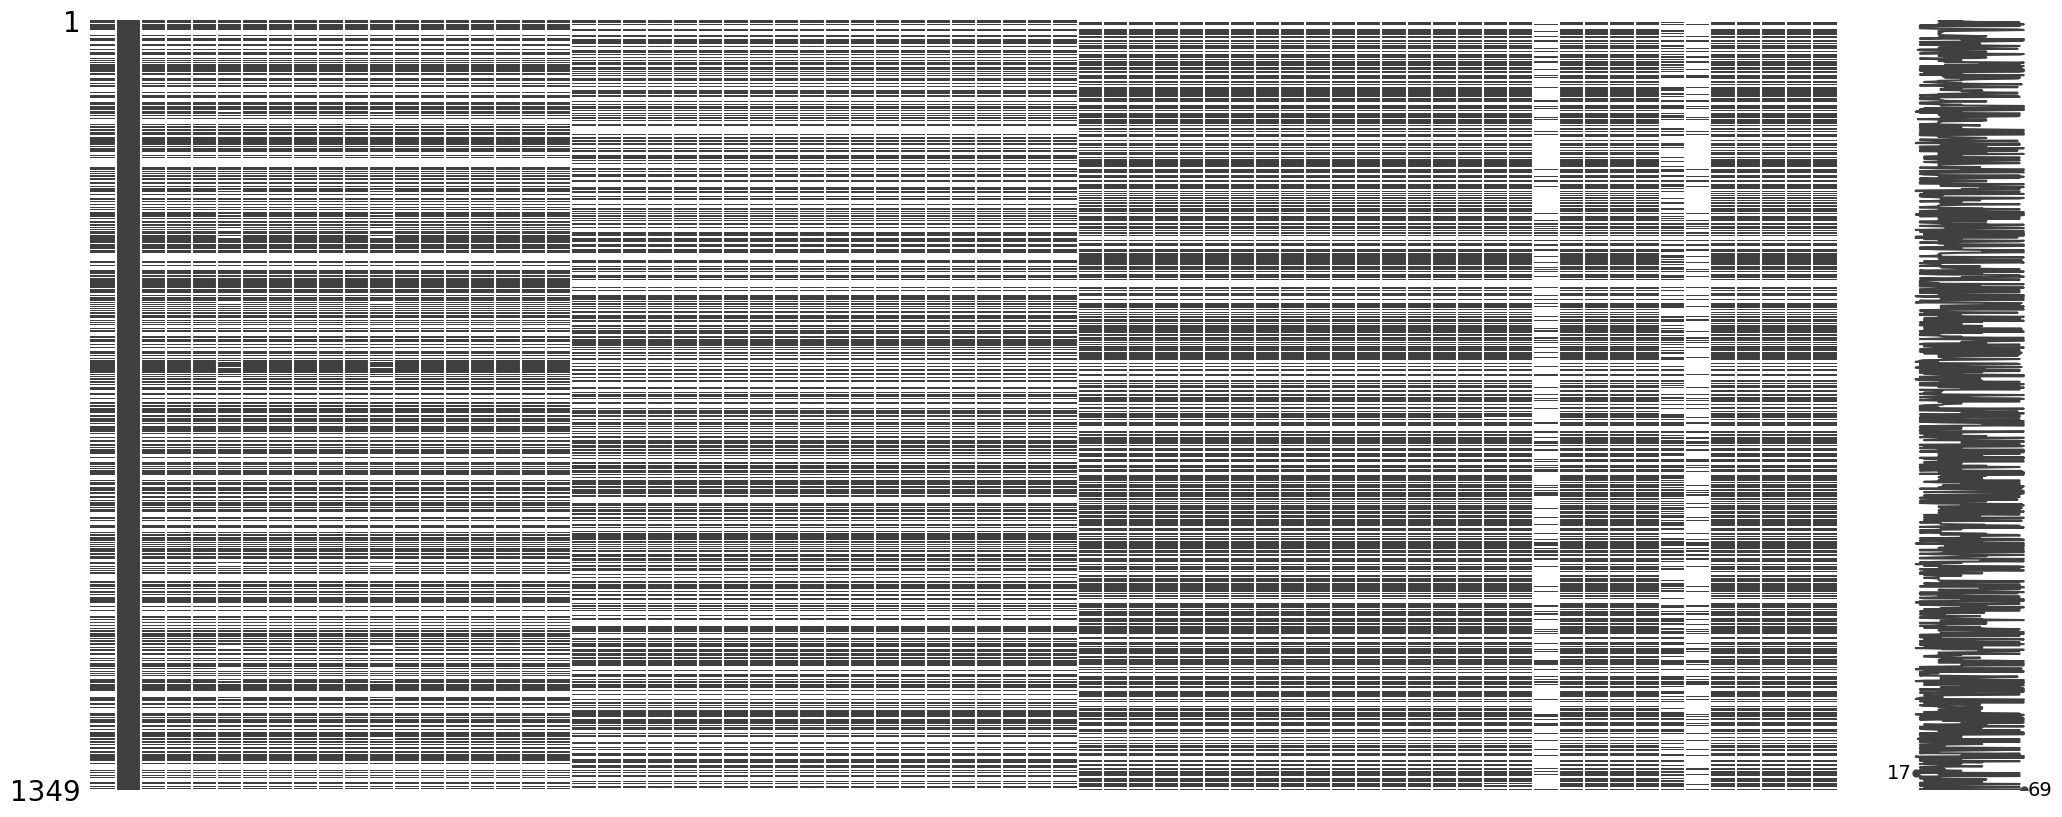

In [4]:
mo.matrix(df)

Observamos diversos dados nulos ao longo do dataset por meio dos pontos em branco

## Filter and Clean

In [5]:
def filter_columns(df, filters: list): 
    selected_columns = [True] * len(df.columns)  
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [6]:
# função de filtro inversa - selecionar colunas na saida
def filter_columns_in(df, filters: list):  
    selected_columns = [False] * len(df.columns) 
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = True
    return df[df.columns[selected_columns]]

In [7]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all')
  _df = _df[~_df.isna().all(axis=1)]
  return _df

## Evolução temporal dos principais indicadores

### INDE

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
ax = sns.set_style('whitegrid')
ax = sns.set_palette('pastel')

In [10]:
df_inde = df[['INDE_2020', 'INDE_2021', 'INDE_2022']]
df_inde = df_inde.apply(pd.to_numeric, errors='coerce')
df_inde_mean = df_inde.mean(axis=0, skipna=True) 

fig = px.bar(df_inde_mean, x=df_inde_mean.index, y=df_inde_mean.values,template='plotly_white')

fig.update_layout(
    title='Evolução do INDE',
    title_font_color='gray',
    yaxis_title='media INDE',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig.update_traces(
    marker=dict(
        color=['gray' if i < 3 else 'royalblue' for i in range(len(df_inde_mean))],
    ),
    selector=dict(type='bar')
)



fig.show()

In [11]:
df_inde_aluno = filter_columns_in(df, ['NOME', 'INDE_20'])
df_inde_aluno = cleaning_dataset(df_inde_aluno)
df_inde_aluno.head()


,NOME,INDE_2020,INDE_2021,INDE_2022
0,ALUNO-1,7.883752,7.319,NaN
1,ALUNO-2,NaN,NaN,7.675509
2,ALUNO-3,7.856389666666666,7.021,NaN
3,ALUNO-4,5.076252,NaN,7.117065
4,ALUNO-5,8.077085,7.399,7.232336


In [12]:
df_inde_aluno.shape

(1349, 4)

### Bolsistas e Indicados para bolsa

In [13]:
df_bolsa = filter_columns_in(df, ['NOME', 'BOLSA', 'BOLSISTA_','ANO_INGRESSO_2022'])
df_bolsa.head()

,NOME,ANO_INGRESSO_2022,BOLSISTA_2022,INDICADO_BOLSA_2022
0,ALUNO-1,NaN,NaN,NaN
1,ALUNO-2,2022.0,Não,Sim
2,ALUNO-3,NaN,NaN,NaN
3,ALUNO-4,2022.0,Não,Não
4,ALUNO-5,2019.0,Não,Não


In [14]:
df_bolsa = cleaning_dataset(df_bolsa)
df_bolsa.head()

,NOME,ANO_INGRESSO_2022,BOLSISTA_2022,INDICADO_BOLSA_2022
1,ALUNO-2,2022.0,Não,Sim
3,ALUNO-4,2022.0,Não,Não
4,ALUNO-5,2019.0,Não,Não
5,ALUNO-6,2022.0,Não,Não
6,ALUNO-7,2022.0,Não,Não


In [15]:
df_bolsa.isna().sum()

NOME                   0
ANO_INGRESSO_2022      0
BOLSISTA_2022          0
INDICADO_BOLSA_2022    0
dtype: int64

In [16]:
df_bolsa['TEMPO_INGRESSO'] = 2022 - df_bolsa['ANO_INGRESSO_2022']
df_bolsa.head()

,NOME,ANO_INGRESSO_2022,BOLSISTA_2022,INDICADO_BOLSA_2022,TEMPO_INGRESSO
1,ALUNO-2,2022.0,Não,Sim,0.0
3,ALUNO-4,2022.0,Não,Não,0.0
4,ALUNO-5,2019.0,Não,Não,3.0
5,ALUNO-6,2022.0,Não,Não,0.0
6,ALUNO-7,2022.0,Não,Não,0.0


In [17]:
df_bolsa['ANO_INGRESSO_2022'] = pd.to_datetime(df_bolsa['ANO_INGRESSO_2022'], format='%Y', errors='coerce').dt.date


De acordo com a equipe da Passos Mágicos, um dos grandes objetivos do programa de ensino é a bolsa de estudos. A base apresenta esse dado com a relação de bolsitas ou indicados à bolsa no ano de 2022. Por meio do ano de ingresso, fizemos uma análise do tempo de ingresso desses alunos, para termos uma idéia de temporalidade, uma vez que não temos uma série temporal tão evidente

In [18]:
df_bolsistas = df_bolsa.groupby('ANO_INGRESSO_2022')['BOLSISTA_2022'].value_counts().reset_index(name='qtde') 
df_bolsistas = df_bolsistas[df_bolsistas['BOLSISTA_2022'] == 'Sim']
df_bolsistas['ANO_INGRESSO_2022'] = pd.to_datetime(df_bolsistas['ANO_INGRESSO_2022'], format='%Y', errors='coerce').dt.date



In [19]:
fig_bolsa = px.bar(df_bolsistas, x='ANO_INGRESSO_2022', y='qtde',template='plotly_white')

fig_bolsa.update_layout(
    title='Alunos bolsistas por ano ingresso',
    title_font_color='gray',
    yaxis_title='qtde',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig_bolsa.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig_bolsa.update_traces(
    marker=dict(
        color=['gray' if i < 5 else 'darkblue' for i in range(len(df_bolsistas))],
    ),
    selector=dict(type='bar')
)

fig_bolsa.show()

In [20]:
df_bolsistas

,ANO_INGRESSO_2022,BOLSISTA_2022,qtde
0,2016-01-01,Sim,20
2,2017-01-01,Sim,22
5,2018-01-01,Sim,27
7,2019-01-01,Sim,25
9,2020-01-01,Sim,4
11,2021-01-01,Sim,10


In [21]:
df_indicados_bolsa = df_bolsa.groupby('ANO_INGRESSO_2022')['INDICADO_BOLSA_2022'].value_counts().reset_index(name='qtde') 
df_indicados_bolsa = df_indicados_bolsa[df_indicados_bolsa['INDICADO_BOLSA_2022'] == 'Sim']
df_indicados_bolsa['ANO_INGRESSO_2022'] = pd.to_datetime(df_indicados_bolsa['ANO_INGRESSO_2022'], format='%Y', errors='coerce').dt.date



In [22]:
df_indicados_bolsa

,ANO_INGRESSO_2022,INDICADO_BOLSA_2022,qtde
1,2016-01-01,Sim,4
3,2017-01-01,Sim,3
5,2018-01-01,Sim,6
7,2019-01-01,Sim,24
9,2020-01-01,Sim,9
11,2021-01-01,Sim,28
13,2022-01-01,Sim,58


In [23]:
fig = px.bar(df_indicados_bolsa, x='ANO_INGRESSO_2022', y='qtde',template='plotly_white')

fig.update_layout(
    title='Alunos indicados a bolsa por ano ingresso',
    title_font_color='gray',
    yaxis_title='qtde',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig.update_traces(
    marker=dict(
        color=['gray' if i < 6 else 'darkblue' for i in range(len(df_indicados_bolsa))],
    ),
    selector=dict(type='bar')
)

fig.show()

### Ponto de Virada

In [24]:
df_pv = filter_columns_in(df, ['NOME','PONTO', 'ANO_IN'])
df_pv = cleaning_dataset(df_pv)
df_pv.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,ANO_INGRESSO_2022,PONTO_VIRADA_2022
0,ALUNO-1,Não,Não,NaN,NaN
1,ALUNO-2,NaN,NaN,2022.0,Não
2,ALUNO-3,Não,Não,NaN,NaN
3,ALUNO-4,Não,NaN,2022.0,Não
4,ALUNO-5,Não,Não,2019.0,Não


In [25]:
df_pv.shape

(1323, 5)

In [26]:
df_pv['PONTO_DE_VIRADA'] = df_pv.apply(lambda row: 1 if row['PONTO_VIRADA_2020'] == 'Sim' or row['PONTO_VIRADA_2021'] == 'Sim' or row['PONTO_VIRADA_2022'] == 'Sim' else 0, axis=1)


In [27]:
df_pv['PONTO_DE_VIRADA'].value_counts()

PONTO_DE_VIRADA
0    1078
1     245
Name: count, dtype: int64

In [28]:
df_pv['TEMPO_INGRESSO'] = 2022 - df_pv['ANO_INGRESSO_2022']
df_pv['ANO_INGRESSO_2022'] = pd.to_datetime(df_pv['ANO_INGRESSO_2022'], format='%Y', errors='coerce').dt.date
df_pv.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,ANO_INGRESSO_2022,PONTO_VIRADA_2022,PONTO_DE_VIRADA,TEMPO_INGRESSO
0,ALUNO-1,Não,Não,NaT,NaN,0,NaN
1,ALUNO-2,NaN,NaN,2022-01-01,Não,0,0.0
2,ALUNO-3,Não,Não,NaT,NaN,0,NaN
3,ALUNO-4,Não,NaN,2022-01-01,Não,0,0.0
4,ALUNO-5,Não,Não,2019-01-01,Não,0,3.0


In [29]:
df_pv_positivo = df_pv.groupby('ANO_INGRESSO_2022')['PONTO_DE_VIRADA'].value_counts().reset_index(name='qtde') # Convert the Series to a DataFrame using reset_index
df_pv_positivo = df_pv_positivo[df_pv_positivo['PONTO_DE_VIRADA'] == 1]

fig = px.bar(df_pv_positivo, x='ANO_INGRESSO_2022', y='qtde',template='plotly_white')

fig.update_layout(
    title='Alunos que atingiram o Ponto de Virada por ano ingresso',
    title_font_color='gray',
    yaxis_title='qtde',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig.update_traces(
    marker=dict(
        color=['gray' if i < 7 else 'royalblue' for i in range(len(df_pv_positivo))],
    ),
    selector=dict(type='bar')
)

fig.show()

In [30]:
df_pv_positivo

,ANO_INGRESSO_2022,PONTO_DE_VIRADA,qtde
1,2016-01-01,1,14
3,2017-01-01,1,15
5,2018-01-01,1,19
7,2019-01-01,1,48
9,2020-01-01,1,12
11,2021-01-01,1,45
13,2022-01-01,1,42


In [31]:
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

### Ingles, Português e Matemática

In [32]:
df_materias = filter_columns_in(df, ['NOME', 'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'])
df_materias = cleaning_dataset(df_materias)
df_materias.head()

,NOME,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022
1,ALUNO-2,8.200000,9.433333,NaN
3,ALUNO-4,5.000000,5.166667,NaN
4,ALUNO-5,6.666667,7.500000,NaN
5,ALUNO-6,3.000000,8.000000,NaN
6,ALUNO-7,4.666667,6.500000,NaN


In [33]:
df_materias.describe()

,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022
count,860.000000,860.000000,285.000000
mean,5.796318,6.306628,5.839942
std,2.422292,2.092551,2.992093
min,0.000000,0.000000,0.000000
25%,4.316667,5.166667,3.500000
50%,6.000000,6.650000,6.266667
75%,7.833333,7.833333,8.500000
max,10.000000,10.000000,10.000000


In [34]:
df_materias['NOTA_PORT_2022'].mean()

np.float64(5.796317829457364)

In [35]:
df_materias_means = df_materias.select_dtypes(include='number').mean(axis=0)

fig = px.bar(df_materias_means, x=df_materias_means.index, y=df_materias_means.values,template='plotly_white')

fig.update_layout(
    title='Desempenho em Português, Matemática e Inglês em 2022',
    title_font_color='gray',
    yaxis_title='media',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig.update_traces(
    marker=dict(
        color=['gray' if i < 7 else 'royalblue' for i in range(len(df_pv_positivo))],
    ),
    selector=dict(type='bar')
)

fig.show()

### Pedra

De acordo com os entendimento realizado com a equipe da Passos Mágicos, a classificação anual do indicador Pedra (indicador com range de valores categóricos na base) é o trabalho de avaliação final do aluno no período do ano, no qual é medido sua avaliação por meio do INDE (I ndice do Desenvolvimento Educacional). A documentação nos mostra as faixas de classificação do INDE conforme range abaixo:

* Quartzo – 2,405 a 5,506
* Agata – 5,506 a 6,868
* Ametista – 6,868 a 8,230
* Topazio – 8,230 a 9,294

In [36]:
# Transformar os dados para contagem de pedras por ano
df_pedras = df.melt(id_vars=['NOME'], value_vars=['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
                         var_name='Ano', value_name='Pedra')

# Remover entradas nulas
df_pedras.replace({'#NULO!': np.nan, 'D9891/2A': np.nan}, inplace=True)
df_pedras = df_pedras.dropna()

# Contar a quantidade de cada tipo de pedra por ano
df_contagem_pedras = df_pedras.groupby(['Ano', 'Pedra']).size().reset_index(name='Quantidade')

In [37]:
fig = px.histogram(df_contagem_pedras, x='Ano', y='Quantidade',color='Pedra', template='plotly_white')

fig.update_layout(
    title='Status Desempenho - classificação Pedras',
    title_font_color='gray',
    yaxis_title='qtde',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)


fig.show()

O grafico nos mostra uma oscilação na distribuição de alunos classificados / premiados na contagem geral em 2021, contudo pode-se destacar pontos positivos na recuperação do quantitativo, dado uma maior distribuição de alunos nas faixas superiores aos niveis observados em 2020.

Abaixo podemos visualizar mais nitidamente esse efeito:

In [38]:
fig = px.line(df_contagem_pedras, x='Ano', y='Quantidade',color='Pedra', template='plotly_white')

fig.update_layout(
    title='Status Desempenho - classificação Pedras',
    title_font_color='gray',
    yaxis_title='qtde',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)


fig.show()

* Agata - faixa intermediária de classificação  que parte de 5,5 até 6,8 e se sobressai sobre o Quartzo (linha de antecessor e de menor faixa do indicador)
* Amentista - faixa de classificação de pontuação acima de 6,8 até 8,2 que precede à pedra Topazio (maiores classificação) e apresentou uma tendencia de crescimento importante na curva
* Topázio - faixa top de pontuação do INDE que apresenta uma tendência de crescimento e visualmente "cola" na faixa mais baixa (Quartzo)

## Fases

In [39]:
df_indicadores_inde = filter_columns_in(df, ['ANO_INGRESSO_2022', 'NOME', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA_', 'IPV','IAN','INDE_2', 'SINALIZADOR'])
df_indicadores_inde = cleaning_dataset(df_indicadores_inde)
df_indicadores_inde.head()

,NOME,INDE_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,SINALIZADOR_INGRESSANTE_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,ANO_INGRESSO_2022,INDE_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,ALUNO-1,7.883752,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,Ingressante,7.319,7.5,6.3,6.9,8.8,7.7,8.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,7.675509,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0
2,ALUNO-3,7.856389666666666,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,Veterano,7.021,7.1,6.9,6.3,5.6,7.3,7.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-4,5.076252,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,7.117065,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0
4,ALUNO-5,8.077085,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,Veterano,7.399,7.4,7.5,7.5,5.4,8.5,7.4,10.0,2019.0,7.232336,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0


In [40]:
df_indicadores_inde = filter_columns(df_indicadores_inde,['DESTAQUE'])

In [41]:
df_indicadores_inde.head()

,NOME,INDE_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,SINALIZADOR_INGRESSANTE_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,ANO_INGRESSO_2022,INDE_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,ALUNO-1,7.883752,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,Ingressante,7.319,7.5,6.3,6.9,8.8,7.7,8.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,7.675509,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0
2,ALUNO-3,7.856389666666666,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,Veterano,7.021,7.1,6.9,6.3,5.6,7.3,7.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-4,5.076252,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,7.117065,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0
4,ALUNO-5,8.077085,7.50002,8,7.5,7.5,8.4375,8.166665,10,Veterano,7.399,7.4,7.5,7.5,5.4,8.5,7.4,10.0,2019.0,7.232336,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0


In [42]:
df_indicadores_inde.shape


(1349, 27)

In [43]:

df_iaa =filter_columns_in(df, ['NOME','IAA_20' ])

In [44]:
df_iaa = filter_columns(df_iaa, ['DESTAQUE'])
df_iaa.head()

,NOME,IAA_2020,IAA_2021,IAA_2022
0,ALUNO-1,8.500020000000001,7.5,NaN
1,ALUNO-2,NaN,NaN,10.00002
2,ALUNO-3,7.91667,7.1,NaN
3,ALUNO-4,8.000020000000001,NaN,10.00002
4,ALUNO-5,7.50002,7.4,6.41668


In [45]:
df_iaa.groupby('IAA_2020').size()

IAA_2020
0                      21
10.000020000000001     47
3.4999800000000003      1
4.58334                 2
5.41666                 1
5.41667                 2
5.8333200000000005      2
5.83333                 2
5.83334                 3
6.24999                 6
6.25                    2
6.25001                 2
6.33335                 1
6.41668                 1
6.66666                 4
6.66667                 5
6.83334                 1
6.9166799999999995      8
6.91668                 3
7.00002                 3
7.08333                10
7.08334                 2
7.33334                 1
7.4166799999999995     10
7.41668                 2
7.5                    21
7.50001                 2
7.50002                12
7.91667                40
7.9166799999999995      9
7.91668                 3
8.000020000000001      37
8.33334                35
8.33335                 1
8.333350000000001       1
8.41668                 2
8.500020000000001      70
8.75001                44
8.9

In [46]:
df_ieg =filter_columns_in(df, ['NOME','IEG_20' ])

In [47]:
df_ieg = filter_columns(df_ieg, ['DESTAQUE'])
df_ieg.head()

,NOME,IEG_2020,IEG_2021,IEG_2022
0,ALUNO-1,8.7,6.3,NaN
1,ALUNO-2,NaN,NaN,7.581705
2,ALUNO-3,8.9,6.9,NaN
3,ALUNO-4,4.1,NaN,8.071429
4,ALUNO-5,8,7.5,8.557505


In [48]:
df_ieg = cleaning_dataset(df_ieg)

In [49]:
df_ips =filter_columns_in(df, ['NOME','IPS_20' ])
df_ips = cleaning_dataset(df_ips)

In [50]:
df_ips = filter_columns(df_ips, ['DESTAQUE'])

# K-Means

Utilizamos o K-means para criarmos um cluster de alunos com base nos indicadores principais que compõe o INDE para tentarmos observar melhor o comportamento desses índices ao longo do tempo, dado que nossa base não possui uma série temporal bem definida, bem como temos dados ausentes no histórico de cada aluno, o que nos desafia para uma análise mais assertiva.

IEG - Indicador de Engajamento

In [73]:
# Replace non-numerical values with NaN

for col in ['IEG_2020', 'IEG_2021', 'IEG_2022']:
    df_ieg[col] = pd.to_numeric(df_ieg[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ieg = df_ieg.dropna(subset=[col])

# Apply KMeans on the cleaned data
from sklearn.cluster import KMeans
kmeans_ieg = KMeans(n_clusters=4, random_state=42)
kmeans_ieg.fit(df_ieg[['IEG_2020', 'IEG_2021', 'IEG_2022']])
df_ieg['cluster'] = kmeans_ieg.labels_

c:\Users\riosa\OneDrive\PosTech\Modulo 5\datathon\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\riosa\OneDrive\PosTech\Modulo 5\datathon\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


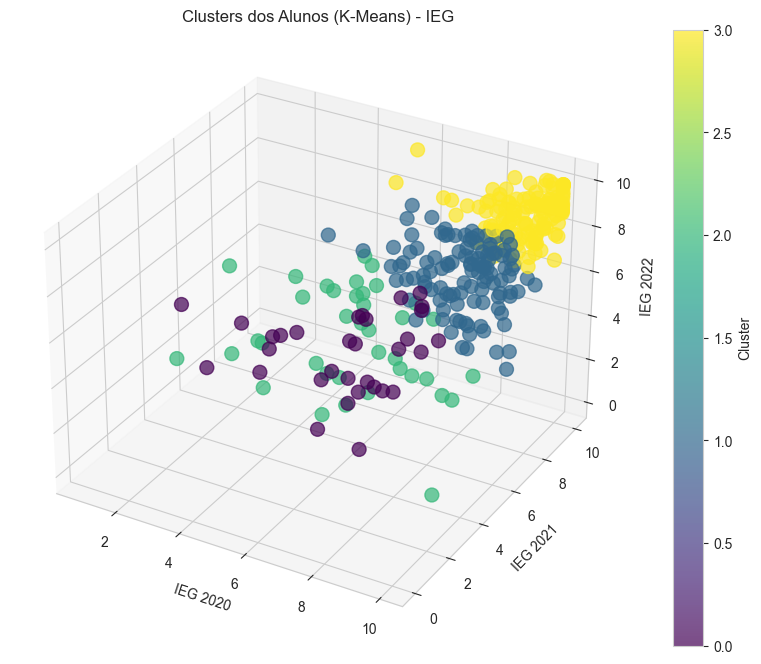

In [74]:
# Criar o scatter plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_ieg['IEG_2020'], df_ieg['IEG_2021'], df_ieg['IEG_2022'],
                     c=df_ieg['cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar título e rótulos
ax.set_title('Clusters dos Alunos (K-Means) - IEG')
ax.set_xlabel('IEG 2020')
ax.set_ylabel('IEG 2021')
ax.set_zlabel('IEG 2022')

# Adicionar a barra de cores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [75]:
df_ieg.query('cluster == 3').describe()

,IEG_2020,IEG_2021,IEG_2022,cluster
count,130.000000,130.000000,130.000000,130.0
mean,9.328462,9.020769,8.992695,3.0
std,0.827271,0.818080,0.754336,0.0
min,5.500000,7.100000,6.060606,3.0
25%,8.925000,8.300000,8.529078,3.0
50%,9.600000,9.200000,9.110349,3.0
75%,10.000000,9.700000,9.574204,3.0
max,10.000000,10.000000,10.000000,3.0


* cluster 0 - possui 32 alunos cujo a média em 2020 é de 7,5 com queda expressiva em 2021 e recuperação (abaixo ainda do inicial) em 6,8 em 2022
* cluster 1 - possui 114 alunos com média inicial de 8,6, com uma queda em 2021 para 6,7 e ligeira recuperação com média de 7,5 
* cluster 2 - possui 38 alunos com baixa média entre e queda nos anos observados 6,0 em 2020, 5,3 em 2021 e 4,5 em 2022 (grupo de menor valor no indicador de Engajamento)
* cluster 3 - possui um grupo de 130 alunos com as maiores médias observadas nesse indicador entre 9,3 e 8,9 (com máximas observadas nos 3 anos de notas 10 e minimo de 9,1) 

IPS - Indicador Psicossocial

In [76]:
# Replace non-numerical values with NaN

for col in ['IPS_2020', 'IPS_2021', 'IPS_2022']:
    df_ips[col] = pd.to_numeric(df_ips[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ips = df_ips.dropna(subset=[col])

# Apply KMeans on the cleaned data
from sklearn.cluster import KMeans
kmeans_ips = KMeans(n_clusters=4, random_state=42)
kmeans_ips.fit(df_ips[['IPS_2020', 'IPS_2021', 'IPS_2022']])
df_ips['cluster'] = kmeans_ips.labels_

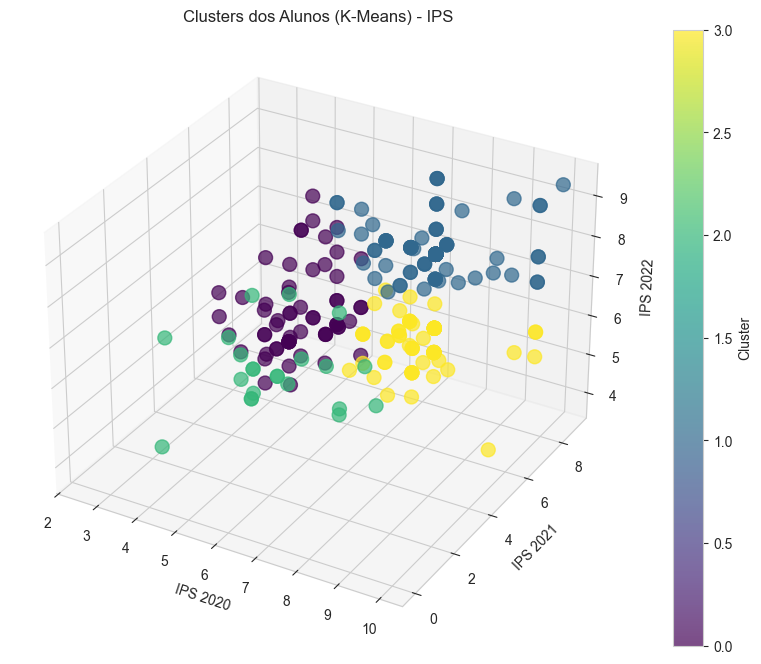

In [77]:
# Criar o scatter plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_ips['IPS_2020'], df_ips['IPS_2021'], df_ips['IPS_2022'],
                     c=df_ips['cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar título e rótulos
ax.set_title('Clusters dos Alunos (K-Means) - IPS')
ax.set_xlabel('IPS 2020')
ax.set_ylabel('IPS 2021')
ax.set_zlabel('IPS 2022')

# Adicionar a barra de cores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [78]:
df_ips.query('cluster == 0').describe()

,IPS_2020,IPS_2021,IPS_2022,cluster
count,62.000000,62.000000,62.000000,62.0
mean,4.616935,6.348387,5.695565,0.0
std,0.778775,0.989575,0.933940,0.0
min,2.500000,5.000000,3.750000,0.0
25%,4.375000,5.600000,5.000000,0.0
50%,5.000000,6.300000,5.625000,0.0
75%,5.000000,7.500000,6.250000,0.0
max,6.250000,7.500000,8.125000,0.0


- Cluster 0 - possui 62 alunos com uma média baixa inicial de 4,6 em 2020, 6,3 em 2021 e queda para 5,6, sendo o cluster com as menores notas minimas e máximas (apresenta o menor desempenho)
- Cluster 1 - possui 162 alunos com média estável nos 3 anos entre 7,4 (2020) e 7,6 (2022). Observa-se também uma estabulidade na sua mediana e desempenho ligeiramente crescente dessas médias
- Cluster 2 - possui 22 alunos com as piores médias e medianas observadas entre 5,4 2020, queda em 2021 (3,4) e ligeiro aumento em 2022 (5,6)
- Cluster 3 - possui 68 alunos com a segunda pior média observada com comportamento descrescente com o tempo e com destaque à oscilação para baixo também da mediana (7,5 em 2020 e 2021 e 5,6 em 2022)

IAA - Indicador de Auto Avaliação

In [79]:
# Replace non-numerical values with NaN

for col in ['IAA_2020', 'IAA_2021', 'IAA_2022']:
    df_iaa[col] = pd.to_numeric(df_iaa[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_iaa = df_iaa.dropna(subset=[col])

# Apply KMeans on the cleaned data
from sklearn.cluster import KMeans
kmeans_iaa = KMeans(n_clusters=4, random_state=42)
kmeans_iaa.fit(df_iaa[['IAA_2020', 'IAA_2021', 'IAA_2022']])
df_iaa['cluster'] = kmeans_iaa.labels_


In [80]:
df_iaa.head()

,NOME,IAA_2020,IAA_2021,IAA_2022,cluster
4,ALUNO-5,7.50002,7.4,6.41668,3
7,ALUNO-8,8.33334,8.8,9.16668,0
10,ALUNO-11,9.00002,9.0,8.00002,0
16,ALUNO-17,9.50002,9.5,9.50002,0
17,ALUNO-18,9.58335,10.0,0.00000,2


In [81]:
df_iaa['cluster'].value_counts()

cluster
0    190
3     89
2     18
1     17
Name: count, dtype: int64

De acordo com as informações obtidas em entrevista com o time de dados e ex-alunos da Passos Mágicos, esse é um dos indicadores mais importantes na composição do INDE, pois é um indicador que mostra o quanto o aluno está enxergando sua evolução dentro da trilha de aprendizado em cada fase. Esse indicador pode retratar sua auto estima e ser determinante para o ponto de virada do aluno.

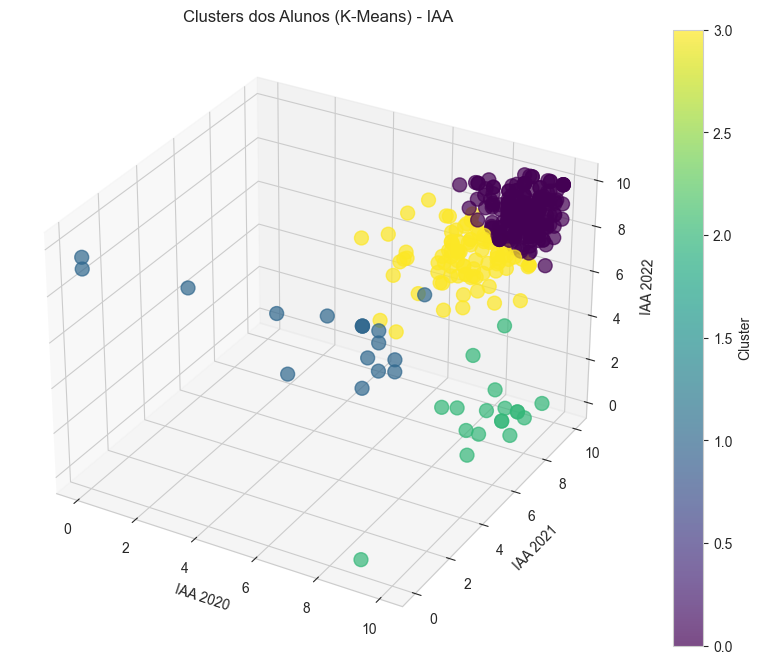

In [82]:
# Criar o scatter plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_iaa['IAA_2020'], df_iaa['IAA_2021'], df_iaa['IAA_2022'],
                     c=df_iaa['cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar título e rótulos
ax.set_title('Clusters dos Alunos (K-Means) - IAA')
ax.set_xlabel('IAA 2020')
ax.set_ylabel('IAA 2021')
ax.set_zlabel('IAA 2022')

# Adicionar a barra de cores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Pensando no modelo de classificação interno da Passos Mágicos que separa os alunos em 4 niveis ou pedras, sugerimos uma distribuição no algoritimo em 4 clusters e visualizamos nessa sugestão que os indicadores dentro dos clusters possuem uma variação interessante:

- Cluster  0 - possui 82 valores com uma média entre 7.9 e 7.5 entre os anos de 2020 e 2022 (pequena oscilação de queda)
- Cluster 1 - possui 18 valores com uma média maior em 2020 e 2021 porém com alunos com queda ou indicador zerado em 2022
- Cluster 2 - possui 17 alunos com média alta em 2020, zerados ou baixa avaliação em 2021 e recuperação de notas em 2022
- Cluster 3 - possui 197 alunos com médias entre 9.1 e 8.9 ao longo dos 3 anos observados, sendo o grupo de melhor performance nesse indicador

In [83]:
df_iaa.query('cluster == 0').describe()

,IAA_2020,IAA_2021,IAA_2022,cluster
count,190.000000,190.000000,190.000000,190.0
mean,9.141685,9.158421,9.000017,0.0
std,0.582480,0.572664,0.666669,0.0
min,7.416680,7.900000,7.083330,0.0
25%,9.000020,8.800000,8.500020,0.0
50%,9.000020,9.200000,9.000020,0.0
75%,9.500020,9.500000,9.500020,0.0
max,10.000020,10.000000,10.000020,0.0


In [84]:
df_iaa.query('cluster == 1').describe()

,IAA_2020,IAA_2021,IAA_2022,cluster
count,17.000000,17.000000,17.000000,17.0
mean,7.475504,0.205882,9.122566,1.0
std,3.252380,0.848875,0.890307,0.0
min,0.000000,0.000000,7.083330,1.0
25%,6.666670,0.000000,8.750010,1.0
50%,9.000020,0.000000,9.500020,1.0
75%,9.500020,0.000000,10.000020,1.0
max,10.000020,3.500000,10.000020,1.0


In [85]:
df_iaa.query('cluster == 2').describe()

,IAA_2020,IAA_2021,IAA_2022,cluster
count,18.000000,18.000000,18.000000,18.0
mean,8.708348,8.077778,0.388887,2.0
std,0.681367,2.230683,1.131826,0.0
min,7.083330,0.000000,0.000000,2.0
25%,8.375010,7.600000,0.000000,2.0
50%,8.875015,8.500000,0.000000,2.0
75%,9.125015,9.200000,0.000000,2.0
max,9.583350,10.000000,3.499980,2.0


In [86]:
df_iaa.query('cluster == 3').describe()

,IAA_2020,IAA_2021,IAA_2022,cluster
count,89.000000,89.000000,89.000000,89.0
mean,8.037465,7.722472,7.527159,3.0
std,0.948823,0.871356,0.791548,0.0
min,5.416660,5.300000,4.583340,3.0
25%,7.500000,7.100000,7.083330,3.0
50%,8.000020,7.900000,7.500020,3.0
75%,8.750010,8.300000,7.916680,3.0
max,9.583350,9.500000,9.000020,3.0


In [88]:
for col in ['INDE_2020', 'INDE_2021', 'INDE_2022']:
    df_inde_aluno[col] = pd.to_numeric(df_inde_aluno[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_inde_aluno = df_inde_aluno.dropna(subset=[col])

kmeans_inde_aluno = KMeans(n_clusters=4, random_state=42)
kmeans_inde_aluno.fit(df_inde_aluno[['INDE_2020', 'INDE_2021', 'INDE_2022']])
df_inde_aluno['cluster'] = kmeans_inde_aluno.labels_

In [89]:
df_inde_aluno['cluster'].value_counts()

cluster
3    127
1     78
0     69
2     40
Name: count, dtype: int64

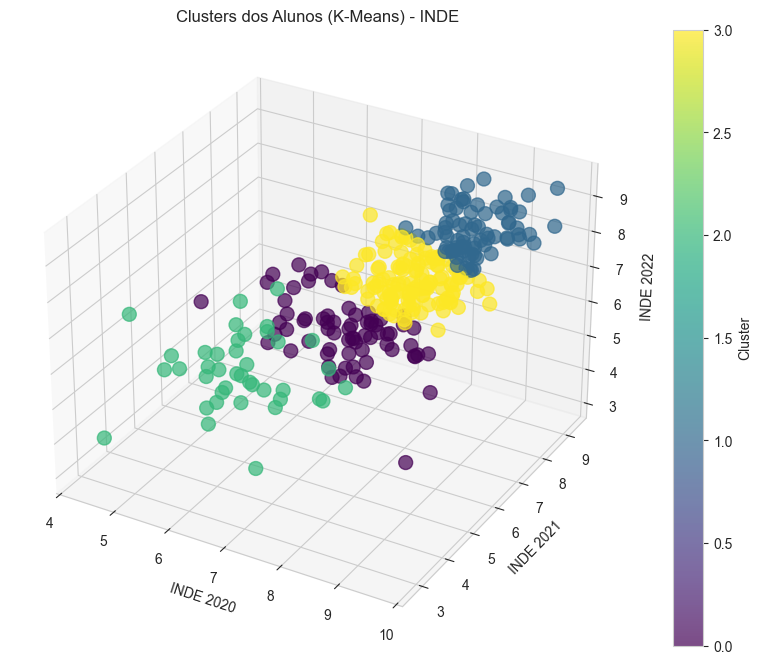

In [90]:
# Criar o scatter plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_inde_aluno['INDE_2020'], df_inde_aluno['INDE_2021'], df_inde_aluno['INDE_2022'],
                     c=df_inde_aluno['cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar título e rótulos
ax.set_title('Clusters dos Alunos (K-Means) - INDE')
ax.set_xlabel('INDE 2020')
ax.set_ylabel('INDE 2021')
ax.set_zlabel('INDE 2022')

# Adicionar a barra de cores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Observando a clusterização por meio do indicador INDE, é possível destacarmos algumas informações importantes, especialmente quanto à evolução dos grupos a partir de 2020:
- Cluster 0 - possui 69 alunos, média decrescente ao longo dos 3 anos entre 7,1 em 2020, 6,4 em 2021 e 5,9 em 2022  (nota min 3 e máx 7,5 nesse ultimo ano)
- Cluster 1 - grupo de 78 alunos com a média na casa de 8 pontos, uma estabilidade nessa faixa observada pela mediana acima de 8, com uma pequena oscilação para baixo na média ao longo do período ( 8,5em 2020 para 8,1 em 2022). Não foram observados nesse grupos minimos e máximos no limite (notas zero ou 10), porém o min global ficou em 6,9 em 2022 e máx em 9,4 (todos anos acima de 9)
- Cluster 2 - grupo de 40 alunos com média entre 6,2 e 5,7, com médiana de 5,7 em 2022, onde temos o cluster com menores médias, especialmente em 2021 (4,3 com máximo de 5,7)
- Cluster 3 - esse grupo possui 127 alunos com média performance descrescente ao longo do tempo (média 2020 = 7,9, 2021 = 7,3 e 2022 = 7,1). Esse clsuter possui um baixo desvio padrão com valores máximos observados em maior queda
Obs: nota-se também de forma geral um desvio padrão abaixo de 1 em todos os clusters

In [91]:
df_inde_aluno.query('cluster == 3').describe()

,INDE_2020,INDE_2021,INDE_2022,cluster
count,127.000000,127.000000,127.000000,127.0
mean,7.947533,7.350961,7.159025,3.0
std,0.469083,0.553308,0.467924,0.0
min,6.799446,5.910000,5.914901,3.0
25%,7.643960,7.063000,6.841740,3.0
50%,7.969167,7.422000,7.180381,3.0
75%,8.273752,7.713500,7.471209,3.0
max,9.098057,8.586000,8.184504,3.0


In [92]:
df_inde_aluno.query('cluster == 2').describe()

,INDE_2020,INDE_2021,INDE_2022,cluster
count,40.000000,40.000000,40.000000,40.0
mean,6.256228,4.396750,5.746964,2.0
std,0.910175,0.778983,0.999073,0.0
min,4.386945,2.735000,3.737944,2.0
25%,5.775886,3.999000,5.039037,2.0
50%,6.172917,4.411000,5.761309,2.0
75%,6.862085,4.989250,6.357293,2.0
max,8.178752,5.742000,8.180904,2.0


In [93]:
df_inde_aluno.query('cluster == 0').describe()

,INDE_2020,INDE_2021,INDE_2022,cluster
count,69.000000,69.000000,69.000000,69.0
mean,7.161188,6.440043,5.938075,0.0
std,0.780152,0.576168,0.791549,0.0
min,4.328751,5.207000,3.031806,0.0
25%,6.611668,6.047000,5.451261,0.0
50%,7.205558,6.379000,6.030206,0.0
75%,7.702085,6.850000,6.527471,0.0
max,8.615210,7.800000,7.555542,0.0


In [94]:
df_inde_aluno.query('cluster == 1').describe()

,INDE_2020,INDE_2021,INDE_2022,cluster
count,78.000000,78.000000,78.000000,78.0
mean,8.580870,8.383269,8.195107,1.0
std,0.425156,0.481702,0.499478,0.0
min,7.613960,7.154000,6.925909,1.0
25%,8.322972,8.014000,7.842084,1.0
50%,8.555488,8.382500,8.203820,1.0
75%,8.823404,8.753500,8.504679,1.0
max,9.712504,9.294000,9.441522,1.0


IPV

In [95]:
df_ipv =filter_columns_in(df, ['NOME','IPV_20' ])
df_ipv = cleaning_dataset(df_ipv)
df_ipv.head()

,NOME,DESTAQUE_IPV_2020,IPV_2020,IPV_2021,DESTAQUE_IPV_2022,IPV_2022
0,ALUNO-1,Seu destaque em 2020: A sua boa integração aos...,7.75,8.1,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,Destaque: A sua boa integração aos Princípios ...,7.916665
2,ALUNO-3,Seu destaque em 2020: A sua boa integração aos...,8.111113333333334,7.2,NaN,NaN
3,ALUNO-4,Ponto a melhorar em 2021: Integrar-se mais aos...,7.75,NaN,Destaque: A sua boa integração aos Princípios ...,8.055553
4,ALUNO-5,Seu destaque em 2020: A sua boa integração aos...,8.166665,7.4,Destaque: A sua boa integração aos Princípios ...,7.833337


In [96]:
df_ipv = filter_columns(df_ipv, ['DESTAQUE'])
df_ipv.head()

,NOME,IPV_2020,IPV_2021,IPV_2022
0,ALUNO-1,7.75,8.1,NaN
1,ALUNO-2,NaN,NaN,7.916665
2,ALUNO-3,8.111113333333334,7.2,NaN
3,ALUNO-4,7.75,NaN,8.055553
4,ALUNO-5,8.166665,7.4,7.833337


In [97]:
for col in ['IPV_2020', 'IPV_2021', 'IPV_2022']:
    df_ipv[col] = pd.to_numeric(df_ipv[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ipv = df_ipv.dropna(subset=[col])

kmeans_ipv = KMeans(n_clusters=4, random_state=42)
kmeans_ipv.fit(df_ipv[['IPV_2020', 'IPV_2021', 'IPV_2022']])
df_ipv['cluster'] = kmeans_ipv.labels_

In [98]:
df_ipv['cluster'].value_counts()

cluster
3    130
1    116
0     48
2     20
Name: count, dtype: int64

Analisamos a clusterização com base no indicador de ponto de virada. De acordo com o CEO da Passos Mágicos, esse índice é considerado um dos mais importantes na composição do INDE, pois é o indicador que reflete a percepção do aluno frente ao processo educacional e é quando ele de fato reconhece que a educação pode mudar sua vida.

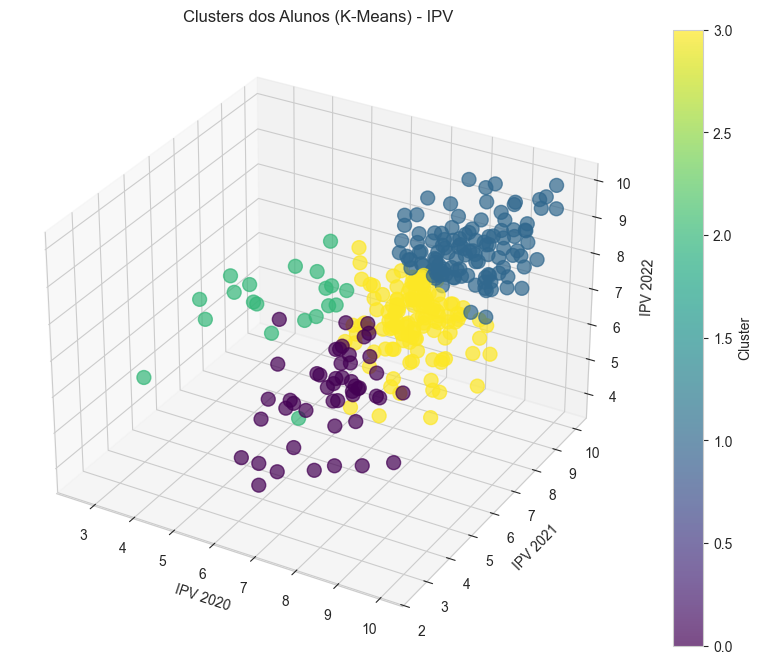

In [99]:
# Criar o scatter plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_ipv['IPV_2020'], df_ipv['IPV_2021'], df_ipv['IPV_2022'],
                     c=df_ipv['cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar título e rótulos
ax.set_title('Clusters dos Alunos (K-Means) - IPV')
ax.set_xlabel('IPV 2020')
ax.set_ylabel('IPV 2021')
ax.set_zlabel('IPV 2022')

# Adicionar a barra de cores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Seguimos na análise da clusterização pelo indicador de ponto de virada também utilizando a premissa de tentarmos separar em 4 grupos, nos quais observamos:
- Cluster 0 - compoe um cluster de 48 alunos com média entre 7,2 em 2020, 4,7 em 2021 e 6,2 em 2022, com uma queda e ligeira evolução nesse indicador, sendo um cluster de baixa mediana (2022 = 6,3)
- Cluster 1 - esse cluster possui 116 alunos e apresenta médias entre 8,3 em 2020, 8,8 em 2021 e uma ligeira queda em 2022 (8,3 pontos). A mediana oscila da mesma forma(maior pico em 2021)
- Cluster 2 - esse cluster contém 20 alunos e apresenta uma média menor em relação aos 2 grupos anteriores (4,9 em 2020, 6,4 em 2021 e 6,9 em 2022) vindo de uma baixa média e recuperação em média, porém em oscilação de piora para min e max em 2022 
- Cluster 3 - esse cluster também com 20 alunos é caracterizado por uma média de 7,6 em 2020 e 2021, queda de quase um ponto em 2022 para 6,9 em 2022. Seu min teve o pior indice nesse ultimo ano (3,7) e pior máximo (8,8) oscilando para cima no desvio padrão (grupo com performance também em destaque pela queda observada)

In [100]:
df_ipv.query('cluster == 3').describe()

,IPV_2020,IPV_2021,IPV_2022,cluster
count,130.000000,130.000000,130.000000,130.0
mean,7.652030,7.654615,6.764100,3.0
std,0.685760,0.715294,0.863148,0.0
min,5.666660,6.100000,3.750000,3.0
25%,7.302084,7.100000,6.090273,3.0
50%,7.666664,7.700000,6.944443,3.0
75%,8.000000,8.275000,7.454860,3.0
max,9.250005,9.100000,8.833335,3.0


In [101]:
df_ipv.query('cluster == 2').describe()

,IPV_2020,IPV_2021,IPV_2022,cluster
count,20.000000,20.000000,20.000000,20.0
mean,4.972221,6.485000,6.996525,2.0
std,1.013950,1.053952,1.020201,0.0
min,2.583340,4.400000,3.916675,2.0
25%,4.472217,6.200000,6.749998,2.0
50%,5.222212,6.550000,7.124995,2.0
75%,5.687496,6.825000,7.645834,2.0
max,6.222213,8.700000,8.333330,2.0


In [102]:
df_ipv.query('cluster == 1').describe()

,IPV_2020,IPV_2021,IPV_2022,cluster
count,116.000000,116.000000,116.000000,116.0
mean,8.372488,8.855172,8.338006,1.0
std,0.814655,0.623921,0.683339,0.0
min,6.583330,7.200000,7.166663,1.0
25%,7.750000,8.400000,7.791667,1.0
50%,8.277777,8.850000,8.250004,1.0
75%,9.000005,9.300000,8.750004,1.0
max,10.000010,10.000000,10.000010,1.0


In [103]:
df_ipv.query('cluster == 0').describe()

,IPV_2020,IPV_2021,IPV_2022,cluster
count,48.000000,48.000000,48.000000,48.0
mean,7.236109,4.785417,6.208621,0.0
std,0.701620,0.982179,1.180114,0.0
min,5.499993,2.500000,3.750008,0.0
25%,6.743054,4.200000,5.517355,0.0
50%,7.250000,5.100000,6.333325,0.0
75%,7.750000,5.500000,7.093746,0.0
max,8.583335,6.200000,8.291673,0.0


In [112]:
from sklearn.preprocessing import LabelEncoder

In [128]:
#pip install matplotlib matplotlib-venn plotly


In [1]:
# Coeficiente de Jaccard
intersection = set(df_ipv['IPV_2020']).intersection(set(df_ipv['IPV_2021']))
union = set(df_ipv['IPV_2020']).union(set(df_ipv['IPV_2021']))
jaccard_similarity = len(intersection) / len(union)

print(f"Coeficiente de Jaccard: {jaccard_similarity}")

NameError: name 'df_ipv' is not defined

In [133]:
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [135]:
intersection

{'Ametista', 'Quartzo', 'Topázio', nan, 'Ágata'}

In [136]:
union

{'#NULO!', 'Ametista', 'Quartzo', 'Topázio', nan, 'Ágata'}

In [139]:
sizes

[6, 5, 5]

## K-Means - Plotly

In [143]:
# Criar figura 3D com Plotly
fig_kmeans_iaa = go.Figure(data=[go.Scatter3d(
    x=df_iaa['IAA_2020'],
    y=df_iaa['IAA_2021'],
    z=df_iaa['IAA_2022'],
    mode='markers',
    marker=dict(color=df_iaa['cluster'], colorscale='Viridis', size=14, opacity=0.7, colorbar=dict(title='Cluster'))
)])

# Configurações de layout
fig_kmeans_iaa.update_layout(
    title='Clusters dos Alunos (K-Means) - IAA',
    scene=dict(
        xaxis_title='IAA 2020',
        yaxis_title='IAA 2021',
        zaxis_title='IAA 2022',
    ),
    width=800,  # largura da figura em pixels
    height=800,  # altura da figura em pixels
)

fig_kmeans_iaa.show()


Pensando no modelo de classificação interno da Passos Mágicos que separa os alunos em 4 niveis ou pedras, sugerimos uma distribuição no algoritimo em 4 clusters e visualizamos nessa sugestão que os indicadores dentro dos clusters possuem uma variação interessante:

- Cluster  0 - possui 190 alunos com uma média entre 9,1 e 9,0 (mediana também nessa faixa) entre os anos de 2020 e 2022 (pequena oscilação de queda). Esse cluster obteve uma nota minima de 7,0.
- Cluster 1 - possui 17 alunos com uma média maior em 2020 (7,4) e 2022 (9,1) e com alunos com queda ou indicador zerado em 2021 (0,2). 
- Cluster 2 - possui 18 alunos com média alta em 2020 e 2021 (8,7 e 8,0) e em seguida aparecem zerados ou baixa avaliação em 2022 (média de 0,3 nesse ano com máximo de 3,4).
- Cluster 3 - possui 89 alunos com médias entre 8 e 7,5 (decaindo gradativamente) nos 3 anos observados, sendo o segundo grupo de melhor performance nesse indicador.

In [144]:
df_iaa.query('cluster == 3').describe()

,IAA_2020,IAA_2021,IAA_2022,cluster
count,89.000000,89.000000,89.000000,89.0
mean,8.037465,7.722472,7.527159,3.0
std,0.948823,0.871356,0.791548,0.0
min,5.416660,5.300000,4.583340,3.0
25%,7.500000,7.100000,7.083330,3.0
50%,8.000020,7.900000,7.500020,3.0
75%,8.750010,8.300000,7.916680,3.0
max,9.583350,9.500000,9.000020,3.0


IDA - Indicador de Aprendizagem

In [145]:
df_ida =filter_columns_in(df, ['NOME','IDA_20' ])
df_ida = cleaning_dataset(df_ida)
df_ida = filter_columns(df_ida, ['DESTAQUE'])

for col in ['IDA_2020', 'IDA_2021', 'IDA_2022']:
    df_ida[col] = pd.to_numeric(df_ida[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ida = df_ida.dropna(subset=[col])

kmeans_ida = KMeans(n_clusters=4, random_state=42)
kmeans_ida.fit(df_ida[['IDA_2020', 'IDA_2021', 'IDA_2022']])
df_ida['cluster'] = kmeans_ida.labels_

    # Criar figura 3D com Plotly
fig_kmeans_ips = go.Figure(data=[go.Scatter3d(
    x=df_ida['IDA_2020'],
    y=df_ida['IDA_2021'],
    z=df_ida['IDA_2022'],
    mode='markers',
    marker=dict(color=df_ips['cluster'], colorscale='Viridis', size=14, opacity=0.7, colorbar=dict(title='Cluster', outlinecolor='rgba(0,0,0,0)'))
)])

# Configurações de layout
fig_kmeans_ips.update_layout(
    title='Clusters dos Alunos (K-Means) - IDA',
    scene=dict(
        xaxis_title='IDA 2020',
        yaxis_title='IDA 2021',
        zaxis_title='IDA 2022',
    ),
    width=800,  # largura da figura em pixels
    height=800,  # altura da figura em pixels
)

In [146]:
df_ida.query('cluster == 3').describe()

,IDA_2020,IDA_2021,IDA_2022,cluster
count,56.000000,56.000000,56.000000,56.0
mean,3.311012,3.242857,4.289881,3.0
std,2.023816,1.829342,1.826906,0.0
min,0.000000,0.000000,0.722222,3.0
25%,1.458333,1.750000,3.054167,3.0
50%,3.875000,3.300000,4.444444,3.0
75%,5.000000,4.425000,5.590278,3.0
max,6.000000,6.900000,8.000000,3.0


- Cluster 0 - possui 78 alunos com média nesse indicador descrecente de forma expressiva a partir de 8,4 em 2020, 4,4 e 4,2 respectivamente em 2021 e 2022
- Cluster 1 - possui 85 alunos e destaca-se pela média estável entre 6,5 (2020) e 6,7 (2022) observada pela mediana e desvio padrão
- Cluster 2 - possui 95 alunos com alta média em 2020 (9,1), queda para faixa de 7,3 (2021) e 7,5 (2022). Seus máximos e mínimos oscilaram para cima no último periodo observado e é o cluster com maior média nesse indicador
- Cluster 3 - possui 56 alunos e apresenta a pior média nos 3 períodos observados (3,3 em 2020, 3,2 em 2021 e 4,2 em 2022). Os máximos observados também foram baixo com uma recuperação em 2022 (8 pontos)



IAN - Indicador de Adequação de nivel

In [147]:
df_ian =filter_columns_in(df, ['NOME','IAN_20' ])
df_ian = cleaning_dataset(df_ian)
df_ian = filter_columns(df_ian, ['DESTAQUE'])

for col in ['IAN_2020', 'IAN_2021', 'IAN_2022']:
    df_ian[col] = pd.to_numeric(df_ian[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ian = df_ian.dropna(subset=[col])

kmeans_ian = KMeans(n_clusters=4, random_state=42)
kmeans_ian.fit(df_ian[['IAN_2020', 'IAN_2021', 'IAN_2022']])
df_ian['cluster'] = kmeans_ian.labels_

    # Criar figura 3D com Plotly
fig_kmeans_ian = go.Figure(data=[go.Scatter3d(
    x=df_ian['IAN_2020'],
    y=df_ian['IAN_2021'],
    z=df_ian['IAN_2022'],
    mode='markers',
    marker=dict(color=df_ian['cluster'], colorscale='Viridis', size=14, opacity=0.7, colorbar=dict(title='Cluster', outlinecolor='rgba(0,0,0,0)'))
)])

# Configurações de layout
fig_kmeans_ian.update_layout(
    title='Clusters dos Alunos (K-Means) - IAN',
    scene=dict(
        xaxis_title='IAN 2020',
        yaxis_title='IAN 2021',
        zaxis_title='IAN 2022',
    ),
    width=800,  # largura da figura em pixels
    height=800,  # altura da figura em pixels
)

In [148]:
df_ian.query('cluster == 3').describe()

,IAN_2020,IAN_2021,IAN_2022,cluster
count,63.000000,63.0,63.0,63.0
mean,9.444444,10.0,10.0,3.0
std,1.583970,0.0,0.0,0.0
min,5.000000,10.0,10.0,3.0
25%,10.000000,10.0,10.0,3.0
50%,10.000000,10.0,10.0,3.0
75%,10.000000,10.0,10.0,3.0
max,10.000000,10.0,10.0,3.0


- Cluster 0 - é composto por 61 alunos com alta média em 2020 (8,4), avaliação 10 em 2021 e média 5 em 2022 
- Cluster 1 - contém 62 alunos também com média inicio de 10 em 2020 porém com queda mais expressiva em 2021 (4,9) e baixa recuperação (nota 6 no útimo período)
- Cluster 2 - cluster com 128 alunos e piores médias: 2020 4,9, 2021 4,9 2022 5,2
- Cluster 3 - contém 63 alunos com as maiores médias oscilando de 9,4 em 2020 para 10 anos seguintes
Os valores aparentemente atipicos acima são corroborados pelo desvio padrão zerado 



IPP - Indicador Psicopedagógico

In [149]:
df_ipp =filter_columns_in(df, ['NOME','IPP_20' ])
df_ipp = cleaning_dataset(df_ipp)
df_ipp = filter_columns(df_ipp, ['DESTAQUE'])

for col in ['IPP_2020', 'IPP_2021', 'IPP_2022']:
    df_ipp[col] = pd.to_numeric(df_ipp[col], errors='coerce')

    # Drop rows with missing values in the specified column
    df_ipp = df_ipp.dropna(subset=[col])

kmeans_ipp = KMeans(n_clusters=4, random_state=42)
kmeans_ipp.fit(df_ipp[['IPP_2020', 'IPP_2021', 'IPP_2022']])
df_ipp['cluster'] = kmeans_ipp.labels_

    # Criar figura 3D com Plotly
fig_kmeans_ipp = go.Figure(data=[go.Scatter3d(
    x=df_ipp['IPP_2020'],
    y=df_ipp['IPP_2021'],
    z=df_ipp['IPP_2022'],
    mode='markers',
    marker=dict(color=df_ipp['cluster'], colorscale='Viridis', size=14, opacity=0.7, colorbar=dict(title='Cluster', outlinecolor='rgba(0,0,0,0)'))
)])

# Configurações de layout
fig_kmeans_ipp.update_layout(
    title='Clusters dos Alunos (K-Means) - IPP',
    scene=dict(
        xaxis_title='IPP 2020',
        yaxis_title='IPP 2021',
        zaxis_title='IPP 2022',
    ),
    width=800,  # largura da figura em pixels
    height=800,  # altura da figura em pixels
)

In [150]:
df_ipp.query('cluster == 2').describe()

,IPP_2020,IPP_2021,IPP_2022,cluster
count,130.000000,130.000000,130.000000,130.0
mean,7.699119,7.768462,5.963942,2.0
std,0.507603,0.544747,0.632234,0.0
min,6.041667,5.900000,3.333333,2.0
25%,7.291667,7.500000,5.664062,2.0
50%,7.708333,7.700000,6.041667,2.0
75%,7.968750,8.100000,6.458333,2.0
max,8.958333,9.200000,7.031250,2.0


- Cluster 0 - contém 57 alunos com média e mediana entre 6 e 7 com baixo desvio padrão 
- Cluster 1 - cluster com 30 alunos e piores médias nas observações sendo 3,0 em 2020, 6,4 em 2021 e 5,4 em 2022
- Cluster 2 - possui 130 alunos com uma média estável em 2020 (7,6) e 2021 (7,7) e queda importante observada no último periodo na média (5,9) bem como nos pontos máximos obtidos (somente 7), valores também com baixo desvio padrão

Features Importances

In [157]:
!pip freeze

asttokens==2.4.1
attrs==23.2.0
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.2
decorator==5.1.1
executing==2.0.1
fastjsonschema==2.20.0
fonttools==4.53.1
future==1.0.0
graphviz==0.20.3
ipykernel==6.29.5
ipython==8.26.0
jedi==0.19.1
joblib==1.4.2
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.5
matplotlib==3.9.1
matplotlib-inline==0.1.7
matplotlib-venn==0.11.10
mime==0.1.0
missingno==0.5.2
nbformat==5.10.4
nest-asyncio==1.6.0
numpy==2.0.0
packaging==24.1
pandas==2.2.2
parso==0.8.4
pillow==10.4.0
platformdirs==4.2.2
plotly==5.22.0
prompt_toolkit==3.0.47
psutil==6.0.0
pure-eval==0.2.2
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
pytz==2024.1
pywin32==306
pyzmq==26.0.3
referencing==0.35.1
rpds-py==0.19.0
scikit-learn==1.5.1
scipy==1.14.0
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
tenacity==8.5.0
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tz

In [151]:
dic_features = {
    'feature': ['IDA_2022', 'IEG_2022', 'IPV_2022', 'IAN_2022', 'IAA_2022', 'IPS_2022', 'IPP_2022'],
    'importance': [0.5167629990492735, 0.3132733220306681, 0.09949371614133294, 0.04432371465176363, 0.01809267211297608, 0.004390094878442941, 0.003663481135542761]
}

df_features = pd.DataFrame(dic_features)

fig = px.bar(df_features, x='feature', y='importance', title='Features Importances', labels={'feature': '', 'importance': 'importance'})

fig.show()


In [152]:
data_features = {
    'feature': ['IDA_2022', 'IEG_2022', 'IPV_2022', 'IAN_2022', 'IAA_2022', 'IPS_2022', 'IPP_2022'],
    'importance': [0.5167629990492735, 0.3132733220306681, 0.09949371614133294, 0.04432371465176363, 0.01809267211297608, 0.004390094878442941, 0.003663481135542761]
}

df_features = pd.DataFrame(data_features)

fig = px.bar(df_features, x='feature', y='importance',template='plotly_white')

fig.update_layout(
    title='Features Importances',
    title_font_color='gray',
    yaxis_title='importances',
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='gray'),
    yaxis2=dict(
        title='',
        title_font=dict(color='gray'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)

fig.update_traces(
    marker=dict(
        color='gray',
    ),
    selector=dict(type='bar')
)

fig.update_traces(
    marker=dict(
        color=['royalblue' if i < 2 else 'gray' for i in range(len(df_pv_positivo))],
    ),
    selector=dict(type='bar')
)

fig.show()

Df para plotly no app (pag Kmeans)

In [153]:
#df_iaa.to_csv('df_iaa.csv', sep=';')
#df_ian.to_csv('df_ian.csv', sep=';')
#df_inde_aluno.to_csv('df_inde_aluno.csv', sep=';')

In [154]:
#df_ipv.to_csv('df_ipv.csv', sep=';')
#df_ips.to_csv('df_ips.csv', sep=';')
#df_ipp.to_csv('df_ipp.csv', sep=';')
#df_ieg.to_csv('df_ieg.csv', sep=';')
#df_ida.to_csv('df_ida.csv', sep=';')
